# HR Analytics Project- Understanding the Attrition in HR

Attrition in HR refers to the gradual loss of employees over time. High attrition is problematic for companies due to various costs and inefficiencies associated with it.

The goal of HR Analytics in this context is to understand the factors influencing attrition and to find ways to predict and potentially reduce it.

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

#to view figures locally
import plotly.offline as py  
import plotly.graph_objs as go
from plotly.figure_factory import create_table


from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBRFClassifier

from colorama import Fore, Back, Style 

# Libraries To check model accuracy, errors and validations

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

from sklearn.metrics import classification_report

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_validate, cross_val_score

from sklearn.metrics import roc_auc_score, roc_curve

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
hr_df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
hr_df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
hr_df.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1465                        0                     3  
1466                        1                     7  
1467                        0                     3  
1468                        0                     8  
1469                        1                     2  

[5 rows x 35 columns]

In [5]:
# Let's Check the distribution of the target variable "Attrition"

attrition_distribution = hr_df['Attrition'].value_counts()

attrition_distribution

No     1233
Yes     237
Name: Attrition, dtype: int64

In [6]:
attrition_distribution = hr_df['Attrition'].value_counts(normalize=True)
attrition_distribution

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

No (Employee stayed): Approximately 83.88%
    
Yes (Employee left): Approximately 16.12%
    
This indicates that there is an imbalance in the classes, with a higher proportion of employees staying (No) compared to those leaving (Yes).

In [7]:
# Check for missing values in the dataset

missing_values = hr_df.isnull().sum()

missing_values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Great news! There are no missing values in the dataset.

In [8]:
hr_df.shape

(1470, 35)

In [9]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
hr_df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

From the table above, here is a summary

The average age of employees in the dataset is around 36.92 years, with the youngest being 18 and the oldest being 60.

On average, employees live around 9.19 units of distance from their workplace.

The mean total working years is about 11.28 years

Employees have been with their current managers for an average of 4.12 years.

Visualization

In [11]:
# Distribution of Age

fig = px.histogram(hr_df, x='Age', title='Distribution of Age', nbins=20, color_discrete_sequence=['#3498db'])

fig.show()

In [12]:
# Attrition by Job Role

role = px.bar(hr_df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack().reset_index(),
                           x='JobRole', y='Yes', title='Attrition Rate by Job Role', labels={'Yes': 'Attrition Rate'},
                           color_discrete_sequence=['#e74c3c'])

role.show()

In [13]:
# Monthly Income vs. Age with Attrition Highlight

age = px.scatter(hr_df, x='Age', y='MonthlyIncome', color='Attrition', title='Monthly Income vs. Age with Attrition Highlight',
                           color_discrete_sequence=['#2ecc71', '#e74c3c'])

age.show()

In [14]:
# Numerical Features vs Attrition

numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany']
for feature in numerical_features:
    fig = px.box(hr_df, x='Attrition', y=feature, title=f'{feature} vs Attrition', color='Attrition', color_discrete_sequence=['#2ecc71', '#e74c3c'])
    fig.show()

In [15]:
# Categorical Features vs Attrition
categorical_features = ['Education', 'EnvironmentSatisfaction', 'JobLevel', 'JobRole', 'MaritalStatus']

for feature in categorical_features:
    fig = px.bar(hr_df.groupby(feature)['Attrition'].value_counts(normalize=True).unstack().reset_index(), x=feature, y='Yes', title=f'Attrition Rate by {feature}', labels={'Yes': 'Attrition Rate'}, color_discrete_sequence=['#3498db'])
    fig.show()

In [16]:
# Let's Encode the Attrition column to numeric values for correlation computation

hr_df['Attrition_num'] = hr_df['Attrition'].apply(lambda x: 1 if x == "Yes" else 0)


In [17]:
hr_df.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StandardHours                  NaN        NaN               NaN        NaN   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   
Attrition_num            -0.159205  -0.056652          0.077924  -0.031373   

                          EmployeeCount  EmployeeNumber  \
Age                                 NaN       -0.010145   
DailyRate                           NaN       -0.050990   
DistanceFromHome                    NaN        0.032916   
Education                           NaN        0.042070   
EmployeeCount                       NaN             NaN   
EmployeeNumber                      NaN        1.000000   
EnvironmentSatisfaction             NaN        0.017621   
HourlyRate                          NaN        0.035179   
JobInvolvement                      NaN       -0.006888   
JobLevel                            NaN       -0.018519   
JobSatisfaction                     NaN       -0.046247   
MonthlyIncome                       NaN       -0.014829   
MonthlyRate                         NaN        0.012648   
NumCompaniesWorked                  NaN       -0.001251   
PercentSalaryHike                   NaN       -0.012944   
PerformanceRating                   NaN       -0.020359   
RelationshipSatisfaction            NaN       -0.069861   
StandardHours                       NaN             NaN   
StockOptionLevel                    NaN        0.062227   
TotalWorkingYears                   NaN       -0.014365   
TrainingTimesLastYear               NaN        0.023603   
WorkLifeBalance                     NaN        0.010309   
YearsAtCompany                      NaN       -0.011240   
YearsInCurrentRole                  NaN       -0.008416   
YearsSinceLastPromotion             NaN       -0.009019   
YearsWithCurrManager                NaN       -0.009197   
Attrition_num                       NaN       -0.010577   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                      

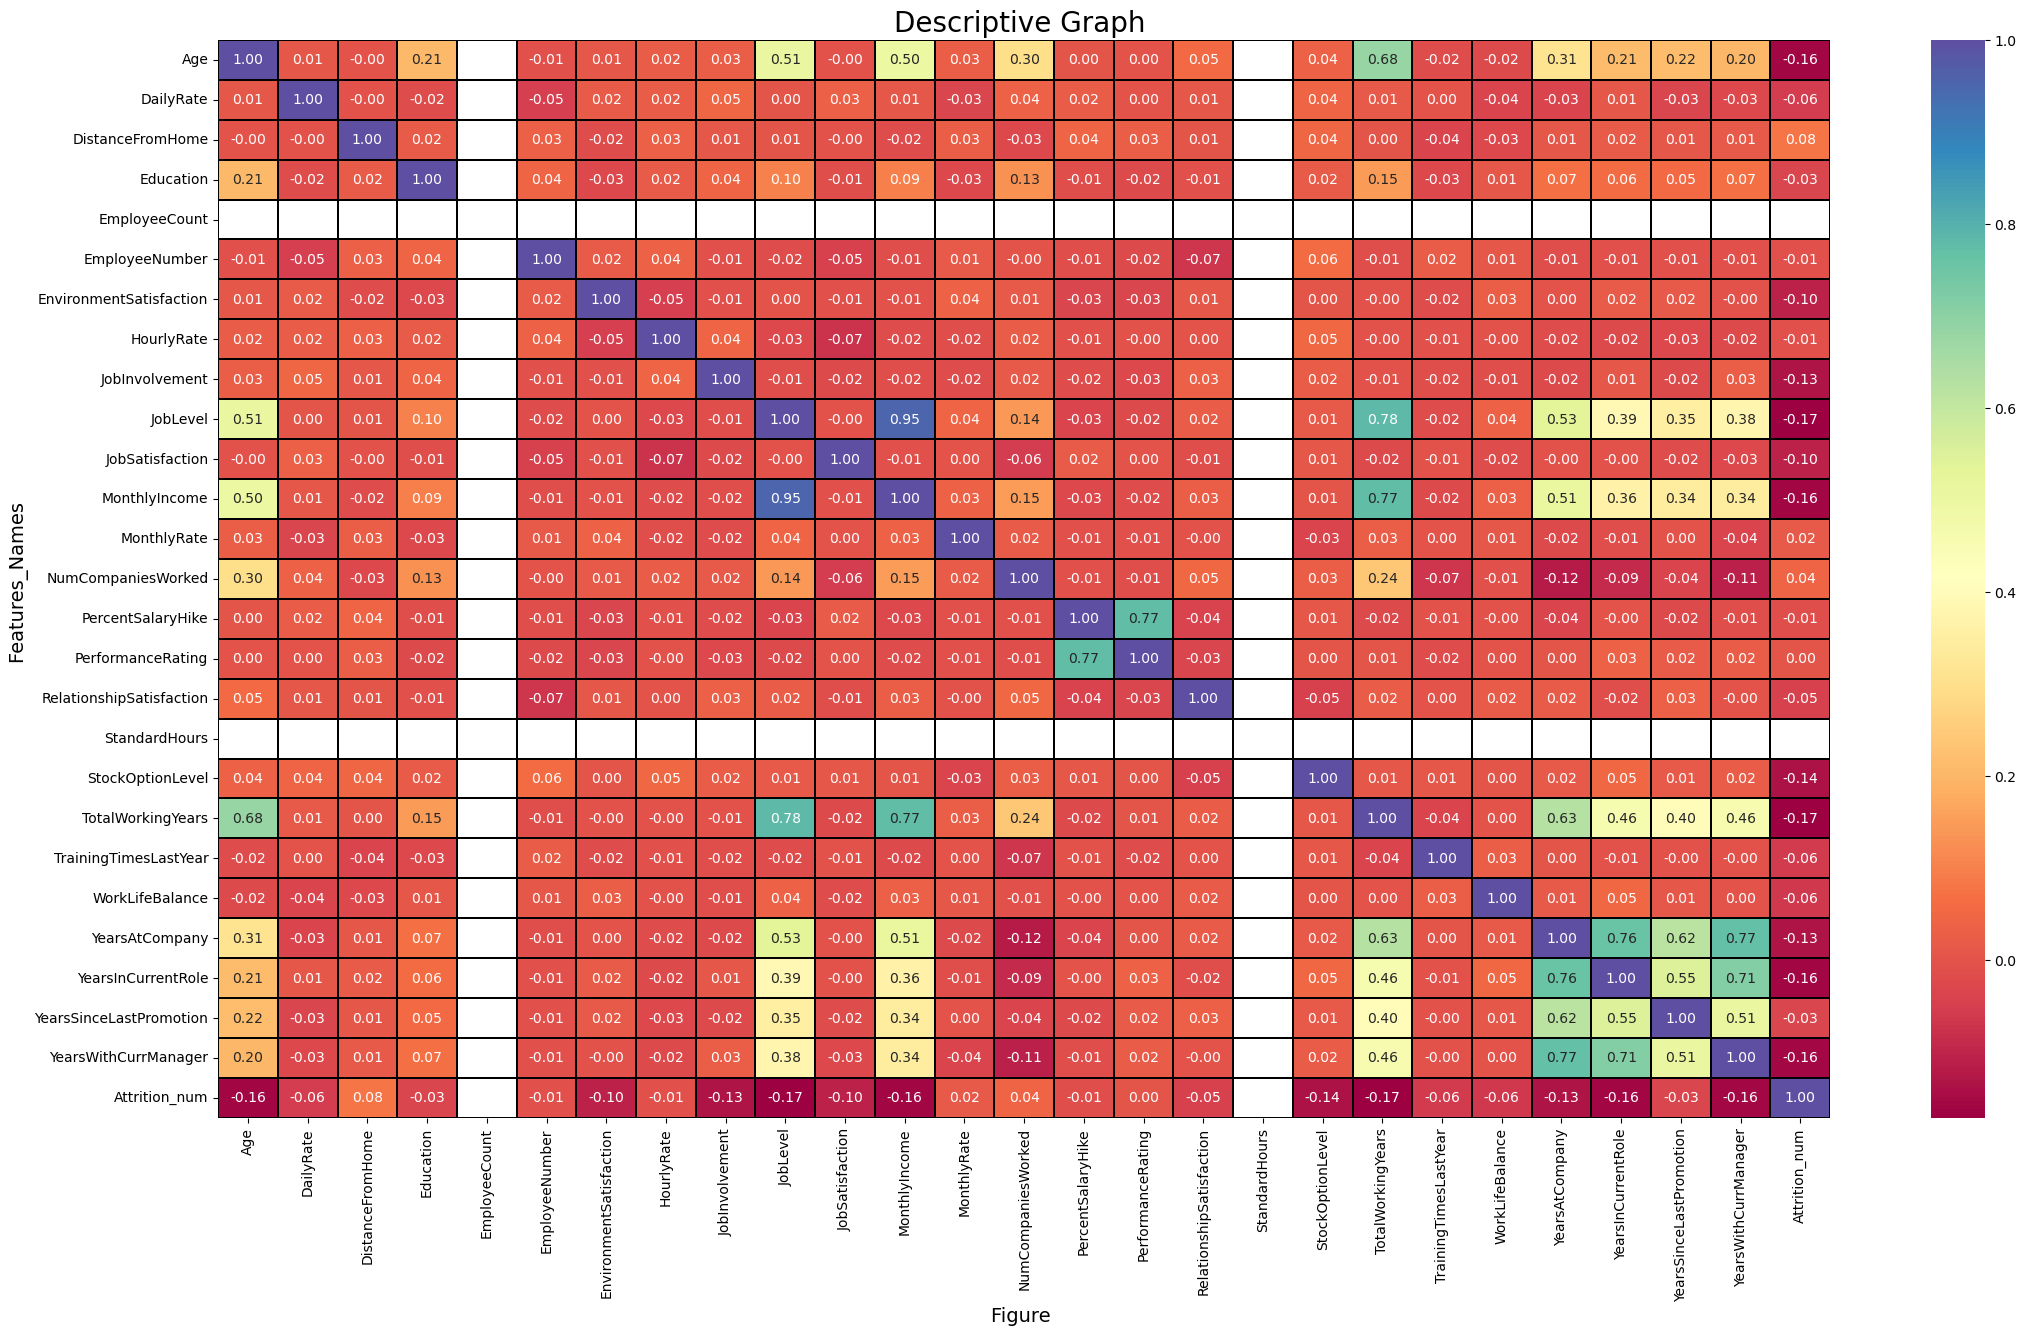

In [18]:
plt.figure(figsize = (26, 14))
sns.heatmap(hr_df.corr(),annot = True, fmt='0.2f',linewidth=0.2, linecolor='black', cmap='Spectral')
plt.xlabel('Figure ', fontsize = 14)
plt.ylabel('Features_Names ', fontsize= 14)
plt.title('Descriptive Graph ', fontsize = 20)

plt.show()

Features like Distance From Home and NumCompaniesWorked have positive correlations, indicating that as these values increase, the likelihood of attrition (employee leaving) also increases.

Features like TotalWorkingYears, JobLevel, and YearsInCurrentRole have negative correlations, suggesting that as these values increase, the likelihood of attrition decreases.

Text(0.5, 1.0, 'Correlation between label and features using barplot')

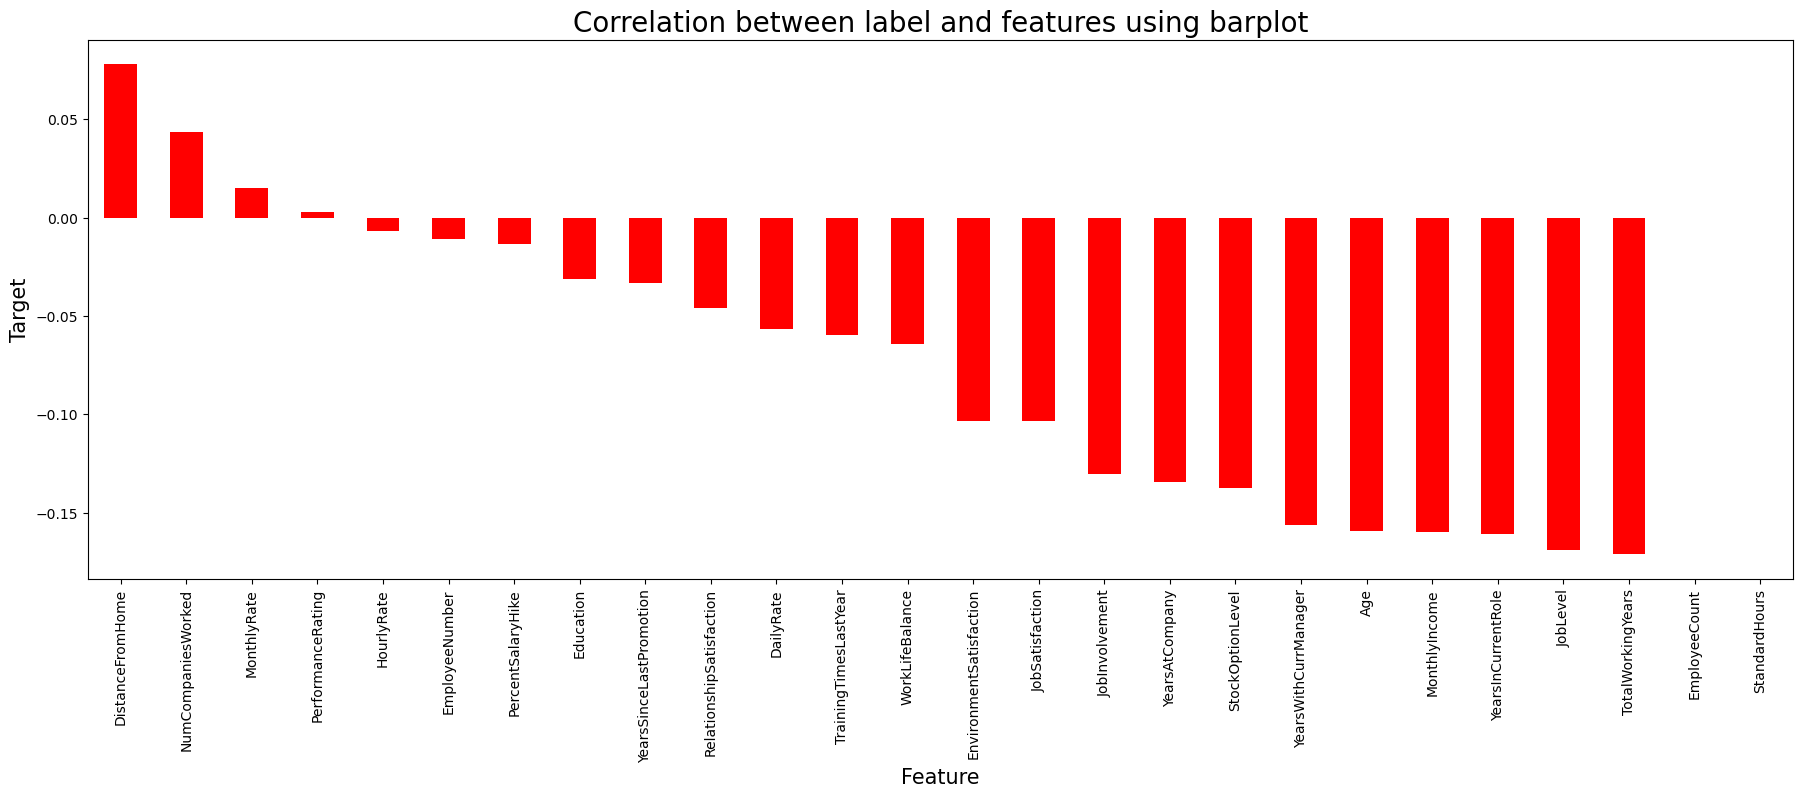

In [19]:
# Visualizing the correlation between label and feautures using bar plot

plt.figure(figsize = (22, 7))
hr_df.corr()['Attrition_num'].sort_values(ascending = False).drop(['Attrition_num']).plot(kind='bar',color='r')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title('Correlation between label and features using barplot', fontsize = 20)

Data Preprocessing

In [20]:
# Drop that is not needed

hr_df = hr_df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'])

hr_df.shape

(1470, 33)

In [21]:
hr_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_num'],
      dtype='object')

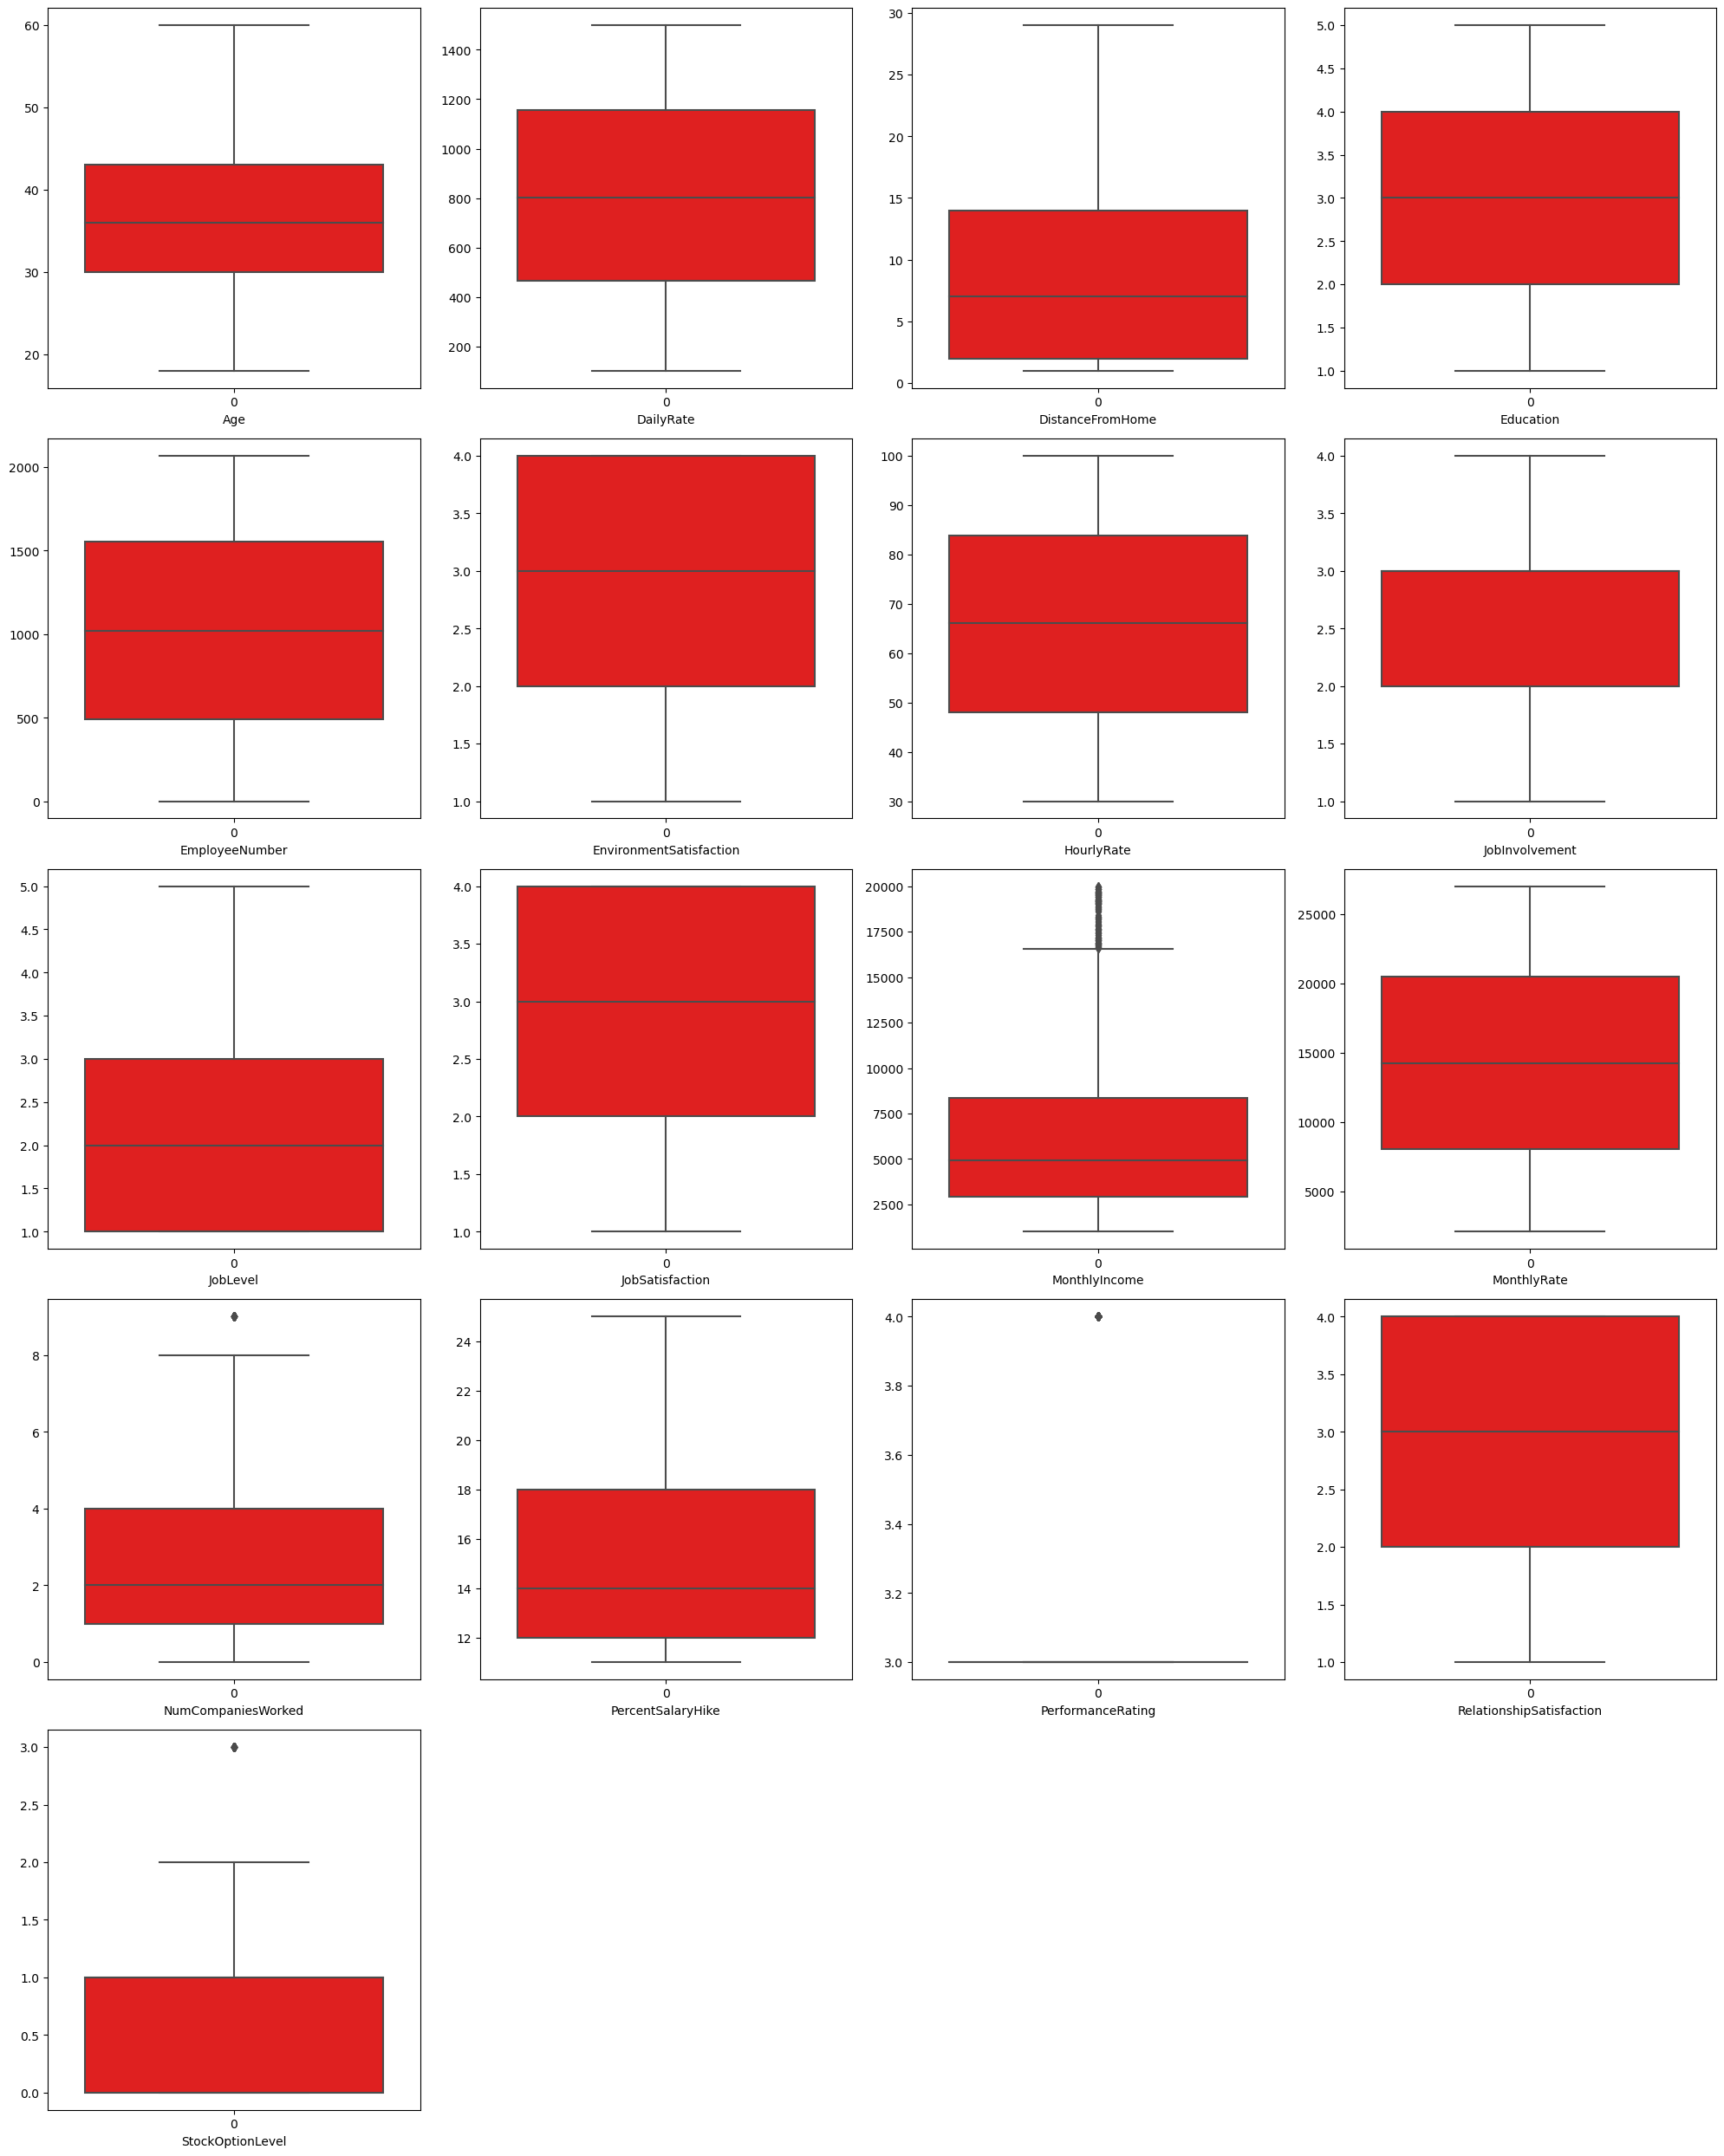

In [22]:

# Select only numerical columns 
numerical_columns = hr_df.select_dtypes(exclude=['object']).columns.tolist()

plt.figure(figsize=(20, 25))
G = 1
for i in numerical_columns:
    if G <= 17:  # Plotting for the first 17 numerical columns
        plt.subplot(5, 4, G)
        sns.boxplot(hr_df[i], color="red")
        plt.xlabel(i)
    G += 1

plt.tight_layout()
plt.show()


from the above, some columns which are MonthlyIncome, NumCompaniesWorked and StockOptionLevel, contains outliers

so, removing the outliers using zscore techniques before building the model and selected best one.


In [23]:
from scipy.stats import zscore

out_features=hr_df[['MonthlyIncome', 'NumCompaniesWorked', 'StockOptionLevel']]
z=np.abs(zscore(out_features))

z

MonthlyIncome  NumCompaniesWorked  StockOptionLevel
0          0.108350            2.125136          0.932014
1          0.291719            0.678049          0.241988
2          0.937654            1.324226          0.932014
3          0.763634            0.678049          0.932014
4          0.644858            2.525591          0.241988
...             ...                 ...               ...
1465       0.835451            0.523316          0.241988
1466       0.741140            0.523316          0.241988
1467       0.076690            0.678049          0.241988
1468       0.236474            0.277594          0.932014
1469       0.445978            0.277594          0.932014

[1470 rows x 3 columns]

In [24]:
# using 3 as the threshold. any value more than 3 is considered as an outlier. from the standard deviation

np.where(z>3)

(array([], dtype=int64), array([], dtype=int64))

In [25]:
# removing the outliers
# keeping all the columns where the z value is less than 3

hr_df1 = hr_df[(z<3).all(axis=1)]

hr_df1.shape

(1470, 33)

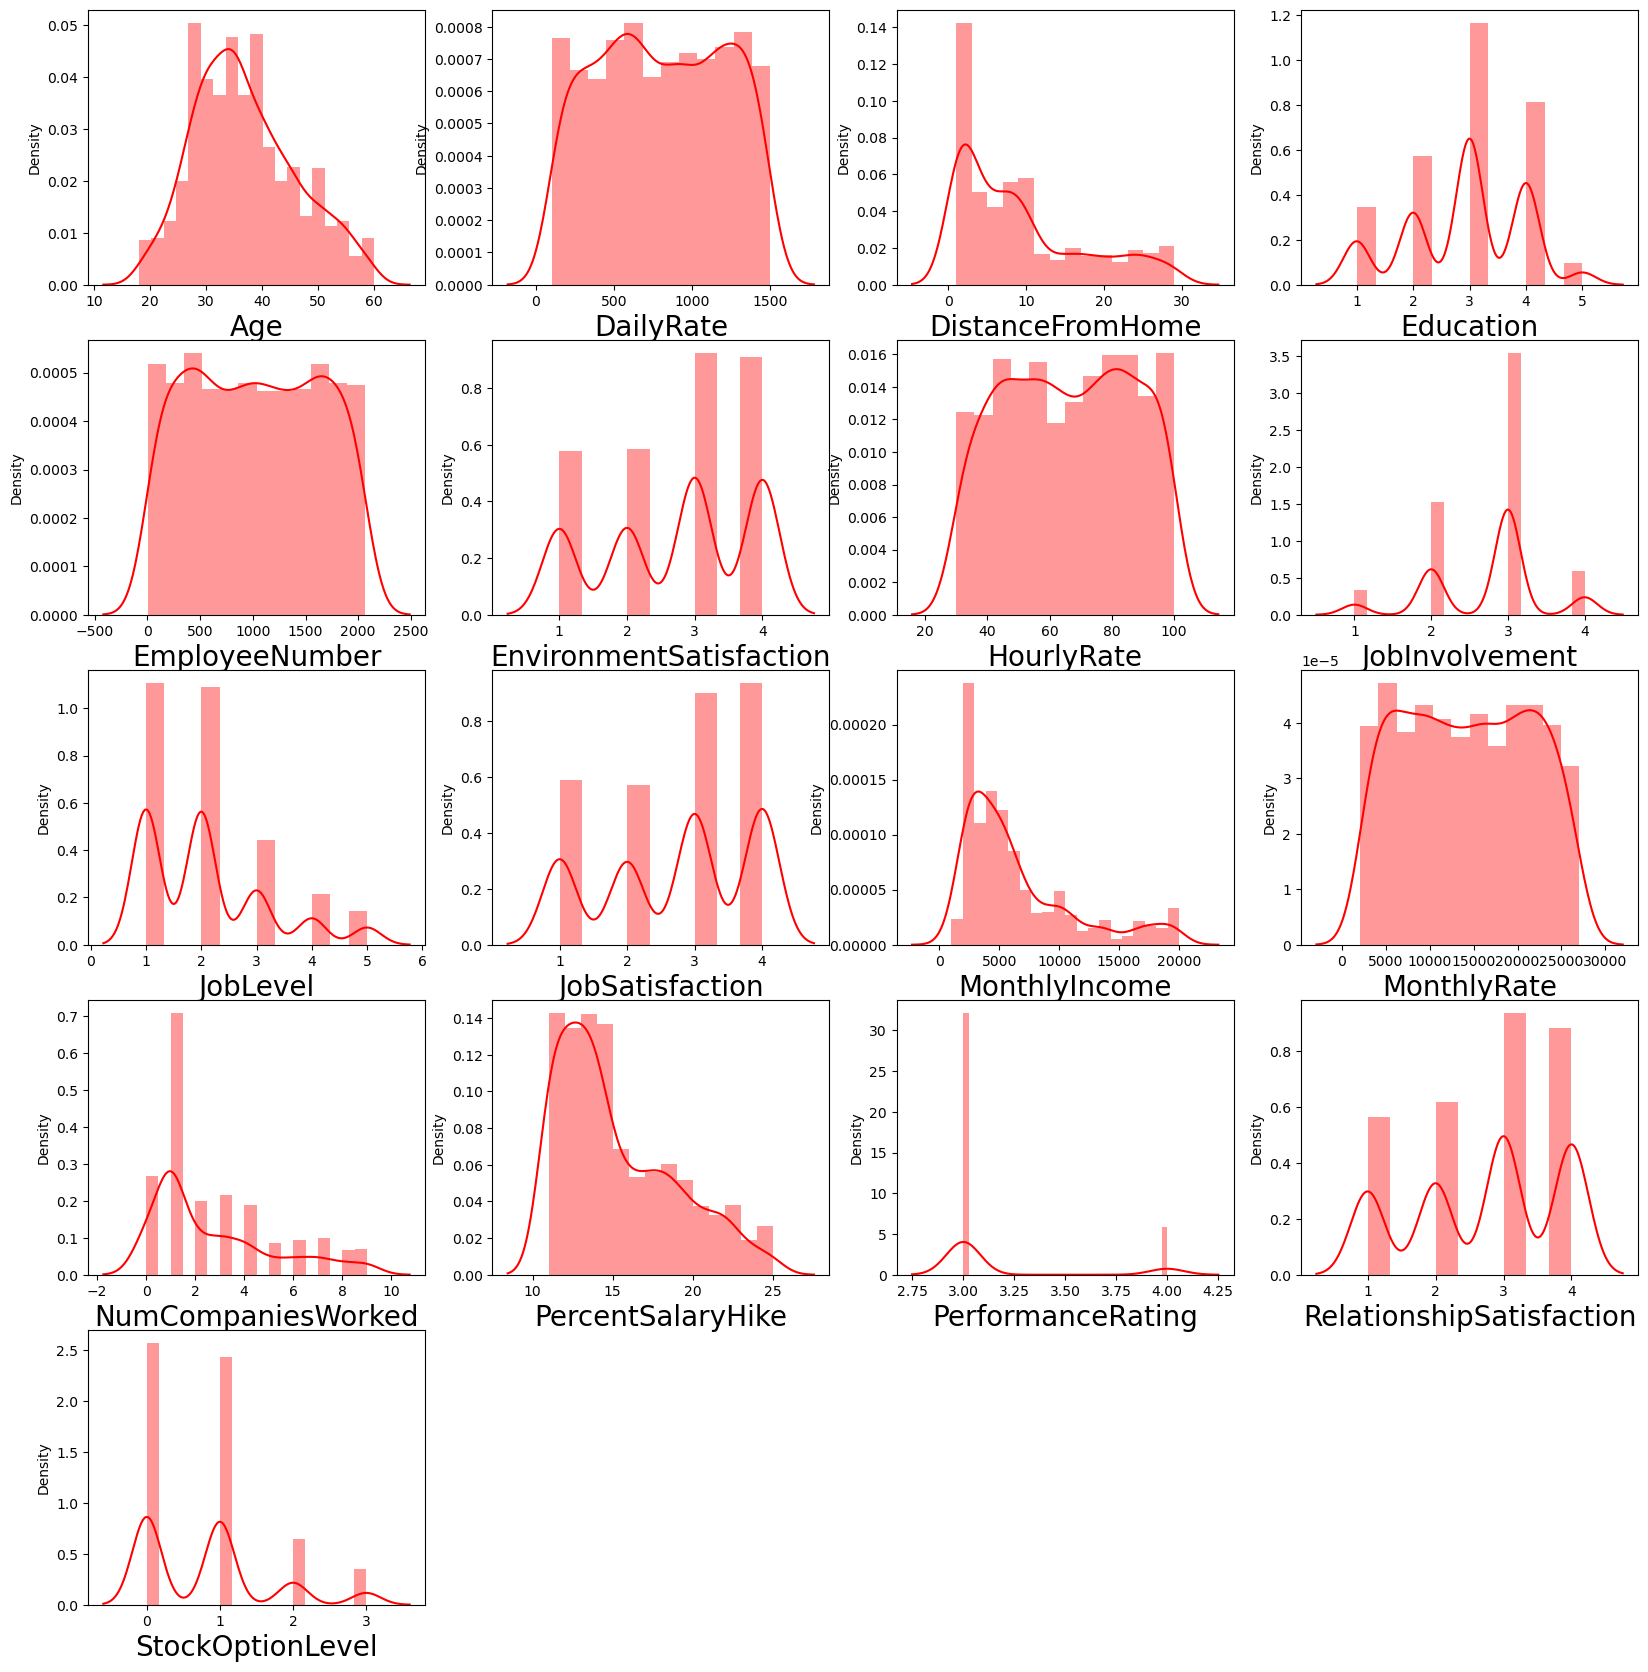

In [26]:
# checking the skewness of the data

numerical_columns = hr_df1.select_dtypes(exclude=['object']).columns.tolist()

plt.figure(figsize = (20, 25))
spot = 1

for i in numerical_columns:
    if spot<=17:
        ax = plt.subplot(6,4, spot)
        sns.distplot(hr_df1[i], color = 'r')
        plt.xlabel(i, fontsize= 20)
    spot+=1
plt.show()

In [27]:
# checking skewness further

hr_df1.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
Attrition_num               1.844366
dtype: float64

In [28]:
# One-hot encode categorical variables
hr_encoded = pd.get_dummies(hr_df1, drop_first=True)

# Display the shape of the data after one-hot encoding
hr_encoded.shape


(1470, 47)

In [29]:
# Seperating the Independent and target variables into x and y

x = hr_encoded.drop("Attrition_num", axis = 1)

y = hr_encoded["Attrition_num"]

print("Feature shape - ", x.shape)

print("Label shape - ", y.shape)

Feature shape -  (1470, 46)
Label shape -  (1470,)


In [30]:
## oversampling

#from imblearn.over_sampling import RandomOverSampler 
#oversample = RandomOverSampler(sampling_strategy="minority")
#x, y = x, y = oversample.fit_resample(x, y)

In [31]:

scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

x

Age  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
0     0.446350   0.742527         -1.010909  -0.891688       -1.701283   
1     1.322365  -1.297775         -0.147150  -1.868426       -1.699621   
2     0.008343   1.414363         -0.887515  -0.891688       -1.696298   
3    -0.429664   1.461466         -0.764121   1.061787       -1.694636   
4    -1.086676  -0.524295         -0.887515  -1.868426       -1.691313   
...        ...        ...               ...        ...             ...   
1465 -0.101159   0.202082          1.703764  -0.891688        1.721670   
1466  0.227347  -0.469754         -0.393938  -1.868426        1.723332   
1467 -1.086676  -1.605183         -0.640727   0.085049        1.726655   
1468  1.322365   0.546677         -0.887515   0.085049        1.728317   
1469 -0.320163  -0.432568         -0.147150   0.085049        1.733302   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                   -0.660531    1.383138        0.379672 -0.057788   
1                    0.254625   -0.240677       -1.026167 -0.057788   
2                    1.169781    1.284725       -1.026167 -0.961486   
3                    1.169781   -0.486709        0.379672 -0.961486   
4                   -1.575686   -1.274014        0.379672 -0.961486   
...                       ...         ...             ...       ...   
1465                 0.254625   -1.224807        1.785511 -0.057788   
1466                 1.169781   -1.175601       -1.026167  0.845911   
1467                -0.660531    1.038693        1.785511 -0.057788   
1468                 1.169781   -0.142264       -1.026167 -0.057788   
1469                -0.660531    0.792660        1.785511 -0.057788   

      JobSatisfaction  ...  JobRole_Laboratory Technician  JobRole_Manager  \
0            1.153254  ...                      -0.462464        -0.273059   
1           -0.660853  ...                      -0.462464        -0.273059   
2            0.246200  ...                       2.162331        -0.273059   
3            0.246200  ...                      -0.462464        -0.273059   
4           -0.660853  ...                       2.162331        -0.273059   
...               ...  ...                            ...              ...   
1465         1.153254  ...                       2.162331        -0.273059   
1466        -1.567907  ...                      -0.462464        -0.273059   
1467        -0.660853  ...                      -0.462464        -0.273059   
1468        -0.660853  ...                      -0.462464        -0.273059   
1469         0.246200  ...                       2.162331        -0.273059   

      JobRole_Manufacturing Director  JobRole_Research Director  \
0                          -0.330808                  -0.239904   
1                          -0.330808                  -0.239904   
2                          -0.330808                  -0.239904   
3                          -0.330808                  -0.239904   
4                          -0.330808                  -0.239904   
...                              ...                        ...   
1465                       -0.330808                  -0.239904   
1466                       -0.330808                  -0.239904   
1467                        3.022901                  -0.239904   
1468                       -0.330808                  -0.239904   
1469                       -0.330808                  -0.239904   

      JobRole_Research Scientist  JobRole_Sales Executive  \
0                      -0.497873                 1.873287   
1                       2.008543                -0.533821   
2                      -0.497873                -0.533821   
3                       2.008543                -0.533821   
4                      -0.497873                -0.533821   
...                          ...                      ...   
1465                   -0.497873                -0.533821   
1466                   -0.497873       

In [32]:
## split the data into training and testing set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state = 42)

In [33]:
accuracy_list = []

In [34]:
# Create and train the SVC classifier
svm = SVC()
svm.fit(x_train, y_train)

# Make predictions and calculate accuracy
svm_pred = svm.predict(x_test)
accuracy = accuracy_score(y_test, svm_pred)
accuracy_list.append(100 * accuracy)

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# Using cross_validate for the SVC classifier
cv_results_svm = cross_validate(svm, x, y, cv=kf, return_train_score=True)

# Using cross_val_score for the SVC classifier
cv_scores_svm = cross_val_score(svm, x, y, cv=kf)

# Convert the cross_validate results to a DataFrame for better visualization
cv_results_svm_df = pd.DataFrame(cv_results_svm)

accuracy_list, cv_results_svm_df, cv_scores_svm

([100.0],
    fit_time  score_time  test_score  train_score
 0  0.035506    0.080922    1.000000          1.0
 1  0.035306    0.080072    1.000000          1.0
 2  0.054775    0.119998    0.996599          1.0
 3  0.039490    0.074734    0.996599          1.0
 4  0.031554    0.080404    0.993197          1.0,
 array([1.        , 1.        , 0.99659864, 0.99659864, 0.99319728]))

In [35]:
print(Fore.BLUE + "Accuracy of SVM is : ", "{:.2f}%".format(100* accuracy))

Accuracy of SVM is :  100.00%


In [36]:

# Evaluation
print("Classification Report:\n", classification_report(y_test, svm_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("ROC-AUC Score:\n", roc_auc_score(y_test, svm_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       320
           1       1.00      1.00      1.00        48

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368

Confusion Matrix:
 [[320   0]
 [  0  48]]
ROC-AUC Score:
 1.0


AUC: 1.00
AUC: 100.00%


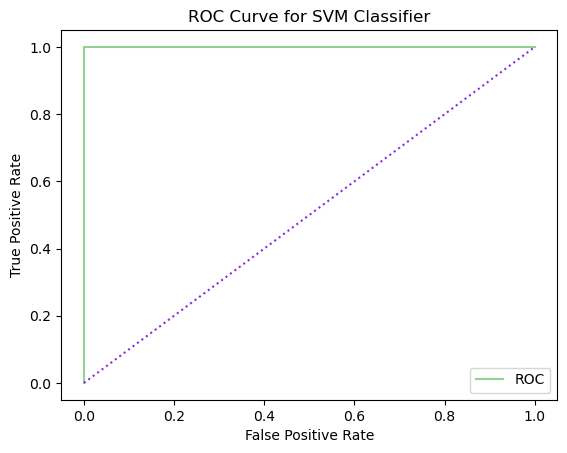

In [37]:
# roc curve
auc_cv = roc_auc_score(y_test, svm_pred)

# To two decimal place
print('AUC: %.2f' %auc_cv)

# In percentage
print('AUC: %.2f%%' % (auc_cv * 100))


fpr, tpr, _ = roc_curve(y_test, svm_pred)
plt.plot(fpr, tpr, color='#92d192', label='ROC')
plt.plot([0, 1], [0, 1], color='#8a2be2', linestyle=':')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Classifier')
plt.legend()
plt.show()

In [38]:
ada_class = AdaBoostClassifier()
ada_class.fit(x_train, y_train)
ada_pred = ada_class.predict(x_test)
ada_acc = accuracy_score(y_test, ada_pred)
accuracy_list.append(100*ada_acc)
# Using cross_validate for the AdaBoost classifier
cv_results_ad = cross_validate(ada_class, x, y, cv=kf, return_train_score=True)
# Using cross_val_score for the Adaboost classifier
cv_scores_ad = cross_val_score(ada_class, x, y, cv=kf)

# Convert the cross_validate results to a DataFrame for better visualization
cv_results_ad_df = pd.DataFrame(cv_results_ad)

accuracy_list, cv_results_ad_df, cv_scores_ad

([100.0, 100.0],
    fit_time  score_time  test_score  train_score
 0  0.009314    0.002506         1.0          1.0
 1  0.007917    0.003025         1.0          1.0
 2  0.006956    0.003024         1.0          1.0
 3  0.010976    0.002988         1.0          1.0
 4  0.003081    0.010580         1.0          1.0,
 array([1., 1., 1., 1., 1.]))

In [39]:
print(Fore.BLUE + "Accuracy of adaBoostClassifier is : ","{:.2f}%".format(100* ada_acc))

Accuracy of adaBoostClassifier is :  100.00%


In [40]:

# Evaluation
print("Classification Report:\n", classification_report(y_test, ada_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, ada_pred))
print("ROC-AUC Score:\n", roc_auc_score(y_test, ada_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       320
           1       1.00      1.00      1.00        48

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368

Confusion Matrix:
 [[320   0]
 [  0  48]]
ROC-AUC Score:
 1.0


AUC: 1.00
AUC: 100.00%


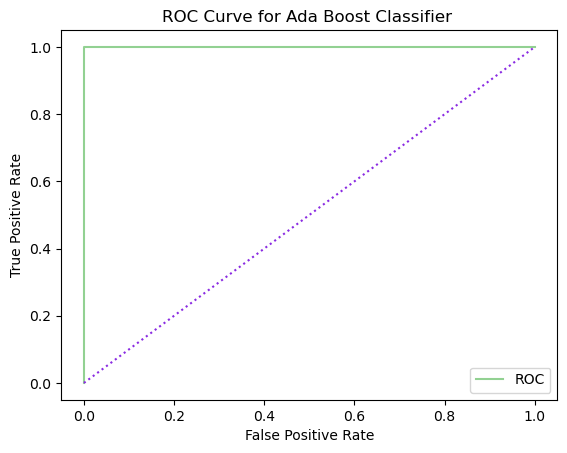

In [41]:
# roc curve
auc_cv = roc_auc_score(y_test, ada_pred)

# To two decimal place
print('AUC: %.2f' %auc_cv)

# In percentage
print('AUC: %.2f%%' % (auc_cv * 100))



fpr, tpr, _ = roc_curve(y_test, ada_pred)
plt.plot(fpr, tpr, color='#92d192', label='ROC')
plt.plot([0, 1], [0, 1], color='#8a2be2', linestyle=':')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Ada Boost Classifier ')
plt.legend()
plt.show()

In [42]:
# Create and train the Logistic Regression classifier
lg_reg = LogisticRegression(random_state=42)
lg_reg.fit(x_train, y_train)

# Make predictions and calculate accuracy
lg_reg_pred = lg_reg.predict(x_test)
lg_reg_acc = accuracy_score(y_test, lg_reg_pred)
accuracy_list.append(100*lg_reg_acc)

# Using cross_validate for the Logistic Regression classifier
cv_results_lg = cross_validate(lg_reg, x, y, cv=kf, return_train_score=True)

# Using cross_val_score for the Logistic Regression classifier
cv_scores_lg = cross_val_score(lg_reg, x, y, cv=kf)

# Convert the cross_validate results to a DataFrame for better visualization
cv_results_lg_df = pd.DataFrame(cv_results_lg)

accuracy_list, cv_results_lg_df, cv_scores_lg

([100.0, 100.0, 100.0],
    fit_time  score_time  test_score  train_score
 0  0.007511    0.000000         1.0          1.0
 1  0.011968    0.002981         1.0          1.0
 2  0.006982    0.000997         1.0          1.0
 3  0.005549    0.000000         1.0          1.0
 4  0.005006    0.005043         1.0          1.0,
 array([1., 1., 1., 1., 1.]))

In [43]:
print(Fore.BLUE + "Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* lg_reg_acc))

Accuracy of Logistic Regression is :  100.00%


In [44]:

# Evaluation
print("Classification Report:\n", classification_report(y_test, lg_reg_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lg_reg_pred))
print("ROC-AUC Score:\n", roc_auc_score(y_test, lg_reg_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       320
           1       1.00      1.00      1.00        48

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368

Confusion Matrix:
 [[320   0]
 [  0  48]]
ROC-AUC Score:
 1.0


AUC: 1.00
AUC: 100.00%


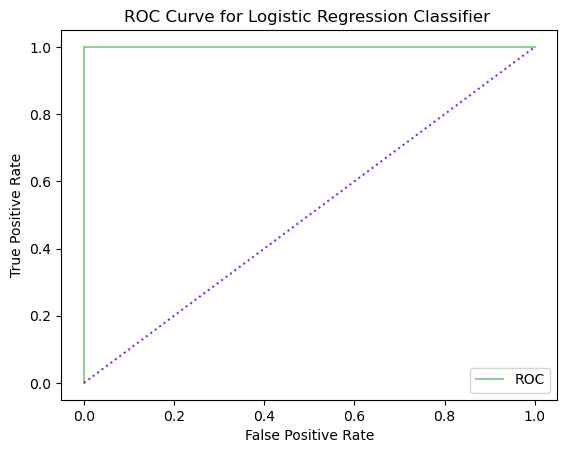

In [45]:
# roc curve
auc_cv = roc_auc_score(y_test, lg_reg_pred)

# To two decimal place
print('AUC: %.2f' %auc_cv)

# In percentage
print('AUC: %.2f%%' % (auc_cv * 100))



fpr, tpr, _ = roc_curve(y_test, lg_reg_pred)
plt.plot(fpr, tpr, color='#92d192', label='ROC')
plt.plot([0, 1], [0, 1], color='#8a2be2', linestyle=':')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Classifier ')
plt.legend()
plt.show()

In [46]:
# Create and train the XGBoost Random Forest classifier
xgb_class = XGBRFClassifier(max_depth=3, random_state=42)
xgb_class.fit(x_train, y_train)

# Make predictions and calculate accuracy
xgb_pred = xgb_class.predict(x_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
accuracy_list.append(100*xgb_acc)

# Using cross_validate for the XGBoost Random Forest classifier
cv_results_xgb = cross_validate(xgb_class, x, y, cv=kf, return_train_score=True)

# Using cross_val_score for the XGBoost Random Forest classifier
cv_scores_xgb = cross_val_score(xgb_class, x, y, cv=kf)

# Convert the cross_validate results to a DataFrame for better visualization
cv_results_xgb_df = pd.DataFrame(cv_results_xgb)

accuracy_list, cv_results_xgb_df, cv_scores_xgb

([100.0, 100.0, 100.0, 100.0],
    fit_time  score_time  test_score  train_score
 0  0.065195    0.005017         1.0          1.0
 1  0.056675    0.013023         1.0          1.0
 2  0.062290    0.007520         1.0          1.0
 3  0.061178    0.004004         1.0          1.0
 4  0.058172    0.010033         1.0          1.0,
 array([1., 1., 1., 1., 1.]))

In [47]:
print(Fore.BLUE + "Accuracy of XGBRFClassifier is : ", "{:.2f}%".format(100* xgb_acc))

Accuracy of XGBRFClassifier is :  100.00%


In [48]:

# Evaluation
print("Classification Report:\n", classification_report(y_test, xgb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("ROC-AUC Score:\n", roc_auc_score(y_test, xgb_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       320
           1       1.00      1.00      1.00        48

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368

Confusion Matrix:
 [[320   0]
 [  0  48]]
ROC-AUC Score:
 1.0


AUC: 1.00
AUC: 100.00%


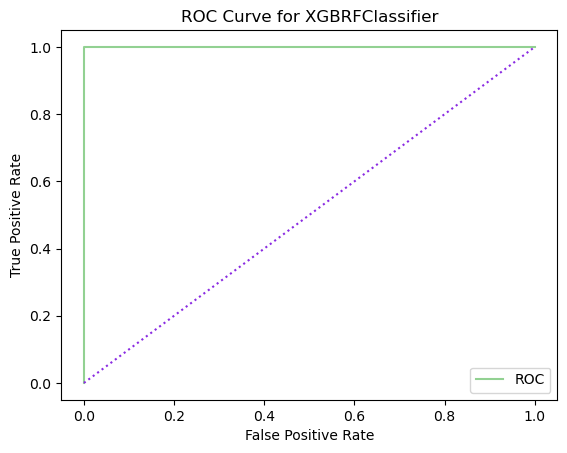

In [49]:
# roc curve
auc_cv = roc_auc_score(y_test, xgb_pred)

# To two decimal place
print('AUC: %.2f' %auc_cv)

# In percentage
print('AUC: %.2f%%' % (auc_cv * 100))



fpr, tpr, _ = roc_curve(y_test, xgb_pred)
plt.plot(fpr, tpr, color='#92d192', label='ROC')
plt.plot([0, 1], [0, 1], color='#8a2be2', linestyle=':')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBRFClassifier')
plt.legend()
plt.show()

In [50]:
import joblib

# save the model as object file

joblib.dump(svm, 'svm.obj')

#load the model from the file

svm_from_joblib=joblib.load('svm.obj')

#use the loaded model to make prediction

svm_from_joblib.predict(x_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,